### Fitting sine wave and applying FFT

t shape: [0.         0.002002   0.004004   0.00600601 0.00800801 0.01001001
 0.01201201 0.01401401 0.01601602 0.01801802 0.02002002 0.02202202
 0.02402402 0.02602603 0.02802803 0.03003003 0.03203203 0.03403403
 0.03603604 0.03803804 0.04004004 0.04204204 0.04404404 0.04604605
 0.04804805 0.05005005 0.05205205 0.05405405 0.05605606 0.05805806
 0.06006006 0.06206206 0.06406406 0.06606607 0.06806807 0.07007007
 0.07207207 0.07407407 0.07607608 0.07807808 0.08008008 0.08208208
 0.08408408 0.08608609 0.08808809 0.09009009 0.09209209 0.09409409
 0.0960961  0.0980981  0.1001001  0.1021021  0.1041041  0.10610611
 0.10810811 0.11011011 0.11211211 0.11411411 0.11611612 0.11811812
 0.12012012 0.12212212 0.12412412 0.12612613 0.12812813 0.13013013
 0.13213213 0.13413413 0.13613614 0.13813814 0.14014014 0.14214214
 0.14414414 0.14614615 0.14814815 0.15015015 0.15215215 0.15415415
 0.15615616 0.15815816 0.16016016 0.16216216 0.16416416 0.16616617
 0.16816817 0.17017017 0.17217217 0.17417417 0.176176

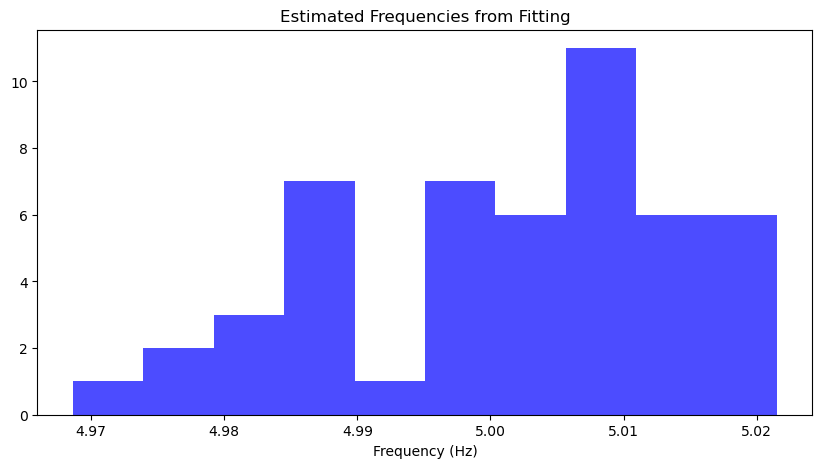

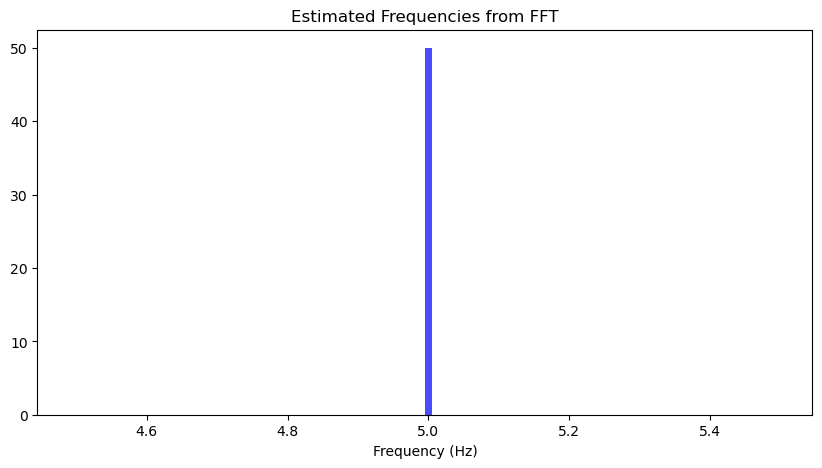

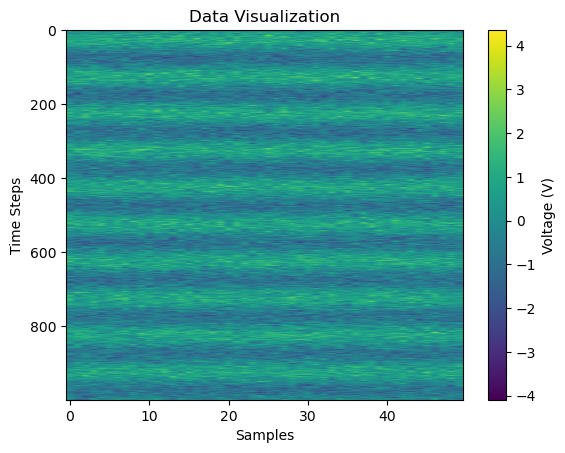

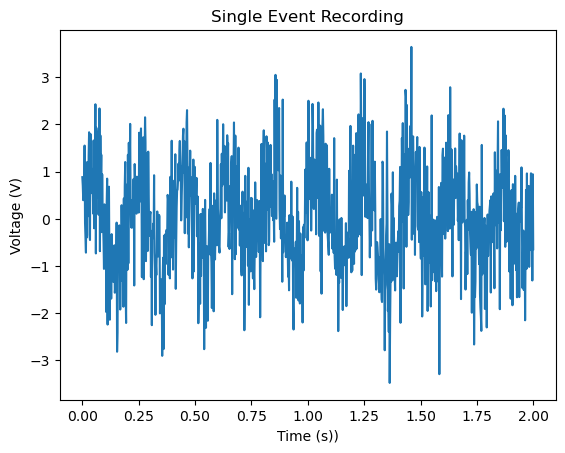

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import norm 

def model(t, A, omega, phi):
        return A * np.sin(omega * t + phi)


# Load the CSV file
file_path_data = 'Week6Data\\week6_5Hz50Samples.csv'
data = pd.read_csv(file_path_data, header=0)

file_path_time = 'Week6Data\\time_variable.csv'
times = pd.read_csv(file_path_time, header=0)

# Convert the data to a NumPy array
data_array = data.to_numpy()
# data_array = data_array.T
t = times.to_numpy()
t = t.flatten() 
# t = t.T

# Print the shape of the data
print(f"t shape: {t}")
print(f"data shape: {data_array}")
# Print the first few rows of the data

freq = 5 #goal frequency in Hz
guesses = [1, freq * 2 * np.pi , 0];

# fit the model to each trace in the data
# Initialize an array to store the fitted parameters
# Loop through each trace in the data


freq_est = np.zeros(data_array.shape[1])
freq_est_fft = np.zeros(data_array.shape[1])
for i in range(data_array.shape[1]):
    
    # Fit the model to the data
    params, _ = curve_fit(model, t, data_array[:, i], p0=guesses)
    # Print the fitted parameters
    print(f"Trace {i+1}: A={params[0]}, omega={params[1]}, phi={params[2]}")
    freq_est[i] = params[1] / (2 * np.pi)

    # Perform FFT on the first trace
    fft_result = np.fft.fft(data_array[:, i])
    fft_freq = np.fft.fftfreq(len(t), d=(t[1] - t[0]))  # Frequency axis

    # Compute the amplitude spectrum
    amplitude_spectrum = np.abs(fft_result) 

    # Find the frequency with the peak response
    peak_freq_index = np.argmax(amplitude_spectrum[:len(amplitude_spectrum)//2])  # Only consider positive frequencies
    freq_est_fft[i] = fft_freq[peak_freq_index]


# Print the frequency with the peak response
print(f"Frequency with peak response: {freq_est_fft[0]} Hz")

# Print the estimated frequencies
print(f"Estimated Frequencies: {freq_est[0]}")
# print mean and SD of the estimated frequencies
print(f"Mean Estimated Frequencies: {np.mean(freq_est)}")
print(f"Standard Deviation of Estimated Frequencies: {np.std(freq_est)}")
# plot a histogram of the estimated frequencies
plt.figure(figsize=(10, 5))
plt.hist(freq_est, bins=10, color='blue', alpha=0.7)
plt.title('Estimated Frequencies from Fitting')
plt.xlabel('Frequency (Hz)')
plt.show()

# plot a histogram of the estimated frequencies
plt.figure(figsize=(10, 5))
plt.hist(freq_est_fft, bins=100, color='blue', alpha=0.7)
plt.title('Estimated Frequencies from FFT')
plt.xlabel('Frequency (Hz)')
plt.show()

# Plot the data as an image
plt.imshow(data_array, cmap='viridis', aspect='auto')
plt.colorbar(label='Voltage (V)')
plt.title('Data Visualization')
plt.xlabel('Samples')
plt.ylabel('Time Steps')
plt.show()

# Plot one trace over time
plt.plot(t, data_array[:, 0])  # Assuming the first column is the trace to plot
plt.title('Single Event Recording')
plt.xlabel('Time (s))')
plt.ylabel('Voltage (V)')
plt.show()

### Bayes application

Frequency measurement = 4.9868043475965536 Hz


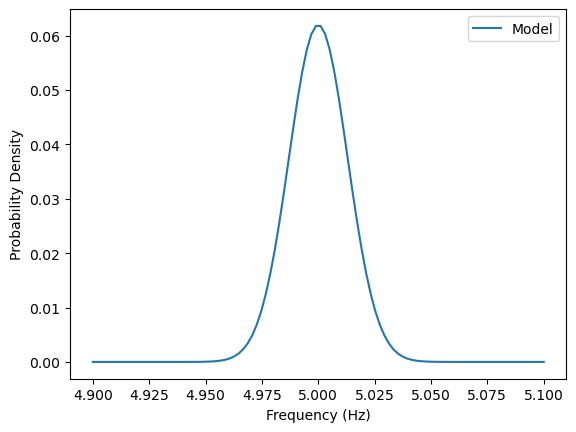

In [2]:
# fit the model to each trace in the data
# Initialize an array to store the fitted parameters
# Loop through each trace in the data


params, _ = curve_fit(model, t, data_array[:, 0], p0=guesses)
freq_est = params[1] / (2 * np.pi)
print(f"Frequency measurement = {freq_est} Hz")

priorMean = 5; priorSD = 0.013

# plot a normal distribution with priormean and priorsd
x = np.linspace(4.9, 5.1, 100)

myprior = norm.pdf(x, priorMean, priorSD)
mylikelihood = norm.pdf(x,freq_est, priorSD)
myposterior = myprior * mylikelihood
# normalize the posterior
myposterior /= np.sum(myposterior)
myprior /= np.sum(myprior)
mylikelihood /= np.sum(mylikelihood)

# what is the frequency of the peak of the posterior
peak_freq_index = np.argmax(myposterior)
peak_freq = x[peak_freq_index]


plt.plot(x, myprior, label='Model')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### JND Estimation

Trace 1: A=0.9328499831238773, omega=31.541651591278097, phi=-0.06972947192581785
Trace 2: A=0.8924431889030966, omega=31.397229523587896, phi=0.022019158952252992
Trace 3: A=0.9470331339567539, omega=31.393121863436885, phi=-0.027153959047544356
Trace 4: A=0.9356315732787053, omega=31.387712744490173, phi=-0.03871359740317281
Trace 5: A=0.9544580539825112, omega=31.431174797867804, phi=0.06946964675260936
Trace 6: A=0.9312022784819226, omega=31.34307936868977, phi=0.10620188275299997
Trace 7: A=0.9150884450881037, omega=31.413982796391352, phi=-0.020571055765150215
Trace 8: A=0.9330321211670448, omega=31.426974783104985, phi=-0.00288194534121924
Trace 9: A=0.87497106330116, omega=31.51621759601449, phi=-0.051600589850665214
Trace 10: A=0.9504800931224074, omega=31.415938184547908, phi=-0.024524523831889584
Trace 11: A=0.9382015122015206, omega=31.418321922796636, phi=0.012516616269703172
Trace 12: A=0.9391011772560023, omega=31.41541531236406, phi=0.06704201317535148
Trace 13: A=0.951

C:\Users\jiunh\AppData\Local\Temp\ipykernel_4500\500076928.py:70: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k*(x-x0))) + b


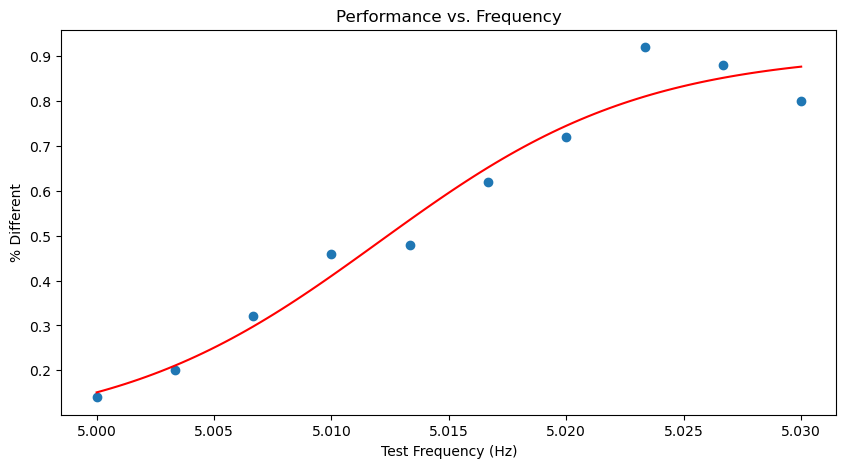

Frequency with peak response: 4.9950000000000045 Hz
Estimated Frequencies: 5.020009764034255
Mean Estimated Frequencies: 5.014856062399255
Standard Deviation of Estimated Frequencies: 0.014364833875153889


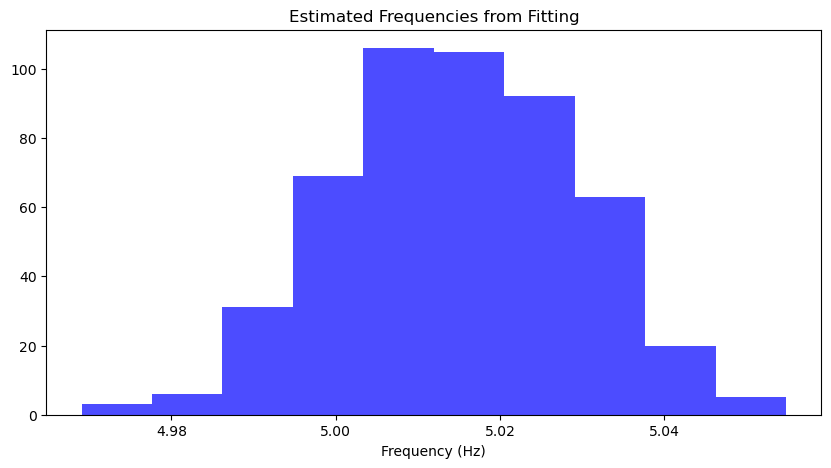

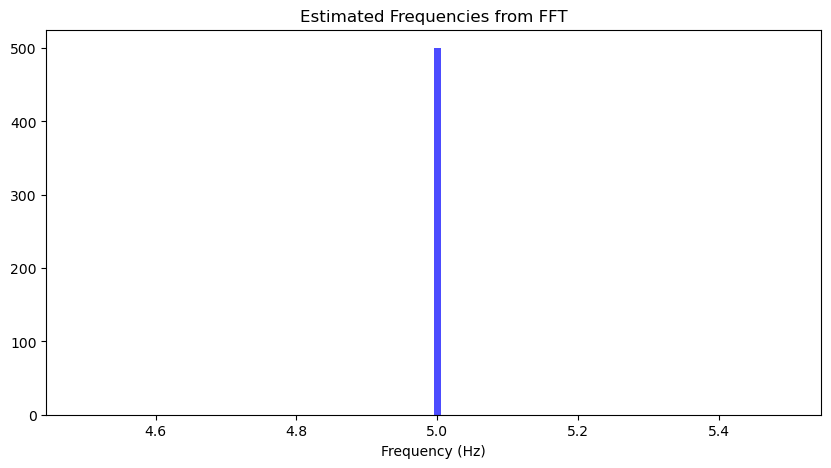

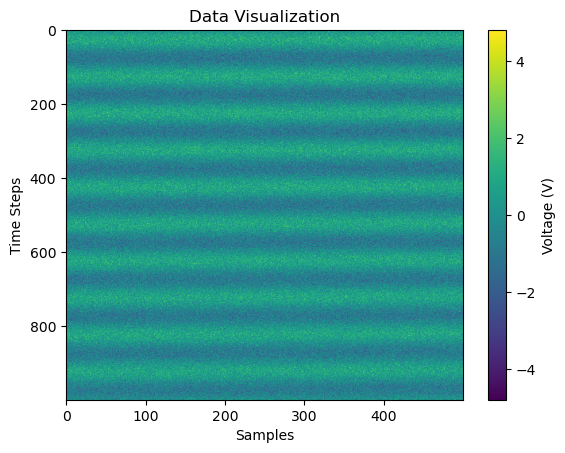

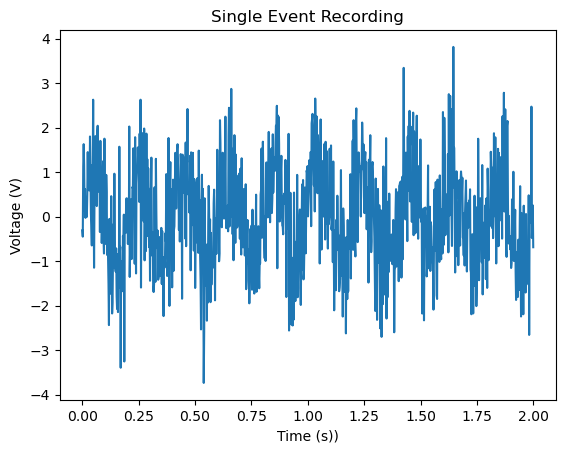

In [3]:
def model(t, A, omega, phi):
        return A * np.sin(omega * t + phi)


# Load the CSV file
file_path_data = 'Week6Data\\week6_JND.csv'
data = pd.read_csv(file_path_data, header=0)

file_path_truth = 'Week6Data\\week6_JND_truth.csv'
gtruth = pd.read_csv(file_path_truth, header=0)

file_path_time = 'Week6Data\\time_variable.csv'
times = pd.read_csv(file_path_time, header=0)

# Convert the data to a NumPy array
data_array = data.to_numpy()
# data_array = data_array.T
t = times.to_numpy()
t = t.flatten() 

gtruth = gtruth.to_numpy()
gtruth = gtruth.flatten()


freq = 5 #goal frequency in Hz
guesses = [1, freq * 2 * np.pi , 0];


freq_est = np.zeros(data_array.shape[1])
freq_est_fft = np.zeros(data_array.shape[1])
for i in range(data_array.shape[1]):
    
    # Fit the model to the data
    params, _ = curve_fit(model, t, data_array[:, i], p0=guesses)
    # Print the fitted parameters
    print(f"Trace {i+1}: A={params[0]}, omega={params[1]}, phi={params[2]}")
    freq_est[i] = params[1] / (2 * np.pi)

    # Perform FFT on the first trace
    fft_result = np.fft.fft(data_array[:, i])
    fft_freq = np.fft.fftfreq(len(t), d=(t[1] - t[0]))  # Frequency axis

    # Compute the amplitude spectrum
    amplitude_spectrum = np.abs(fft_result) 

    # Find the frequency with the peak response
    peak_freq_index = np.argmax(amplitude_spectrum[:len(amplitude_spectrum)//2])  # Only consider positive frequencies
    freq_est_fft[i] = fft_freq[peak_freq_index]

# figure out the mean guess for each true frequency
refMean = 5; refSD = 0.013
threshold = refMean+refSD; 

classify = np.zeros(freq_est.shape[0])
for i in range(len(freq_est)):
    if freq_est[i] >= threshold:
        classify[i] = 1
    else:   
        classify[i] = 0

# how many unique values are in the gtruth data
unique_truth = np.unique(gtruth)
performance = np.zeros(unique_truth.shape[0])
for i in range(len(unique_truth)):
    performance[i] = np.sum(classify[gtruth == unique_truth[i]]/50)

# fit the performance with a logistic function

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k*(x-x0))) + b
popt, _ = curve_fit(sigmoid, unique_truth, performance, p0=[1, 0, 1, 0])
x_fit = np.linspace(min(unique_truth), max(unique_truth), 100)
y_fit = sigmoid(x_fit, *popt)
plt.figure(figsize=(10, 5))
plt.plot(unique_truth, performance, 'o', label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Sigmoid Fit')
plt.title('Performance vs. Frequency')
plt.xlabel('Test Frequency (Hz)')
plt.ylabel('% Different')

print(f"Sigmoid parameters: L={popt[0]}, x0={popt[1]}, k={popt[2]}, b={popt[3]}")

plt.show();

# Print the frequency with the peak response
print(f"Frequency with peak response: {freq_est_fft[0]} Hz")

# Print the estimated frequencies
print(f"Estimated Frequencies: {freq_est[0]}")
# print mean and SD of the estimated frequencies
print(f"Mean Estimated Frequencies: {np.mean(freq_est)}")
print(f"Standard Deviation of Estimated Frequencies: {np.std(freq_est)}")
# plot a histogram of the estimated frequencies
plt.figure(figsize=(10, 5))
plt.hist(freq_est, bins=10, color='blue', alpha=0.7)
plt.title('Estimated Frequencies from Fitting')
plt.xlabel('Frequency (Hz)')
plt.show()

# plot a histogram of the estimated frequencies
plt.figure(figsize=(10, 5))
plt.hist(freq_est_fft, bins=100, color='blue', alpha=0.7)
plt.title('Estimated Frequencies from FFT')
plt.xlabel('Frequency (Hz)')
plt.show()

# Plot the data as an image
plt.imshow(data_array, cmap='viridis', aspect='auto')
plt.colorbar(label='Voltage (V)')
plt.title('Data Visualization')
plt.xlabel('Samples')
plt.ylabel('Time Steps')
plt.show()

# Plot one trace over time
plt.plot(t, data_array[:, 0])  # Assuming the first column is the trace to plot
plt.title('Single Event Recording')
plt.xlabel('Time (s))')
plt.ylabel('Voltage (V)')
plt.show()

### Posterior with Bayes

t shape: [0.         0.002002   0.004004   0.00600601 0.00800801 0.01001001
 0.01201201 0.01401401 0.01601602 0.01801802 0.02002002 0.02202202
 0.02402402 0.02602603 0.02802803 0.03003003 0.03203203 0.03403403
 0.03603604 0.03803804 0.04004004 0.04204204 0.04404404 0.04604605
 0.04804805 0.05005005 0.05205205 0.05405405 0.05605606 0.05805806
 0.06006006 0.06206206 0.06406406 0.06606607 0.06806807 0.07007007
 0.07207207 0.07407407 0.07607608 0.07807808 0.08008008 0.08208208
 0.08408408 0.08608609 0.08808809 0.09009009 0.09209209 0.09409409
 0.0960961  0.0980981  0.1001001  0.1021021  0.1041041  0.10610611
 0.10810811 0.11011011 0.11211211 0.11411411 0.11611612 0.11811812
 0.12012012 0.12212212 0.12412412 0.12612613 0.12812813 0.13013013
 0.13213213 0.13413413 0.13613614 0.13813814 0.14014014 0.14214214
 0.14414414 0.14614615 0.14814815 0.15015015 0.15215215 0.15415415
 0.15615616 0.15815816 0.16016016 0.16216216 0.16416416 0.16616617
 0.16816817 0.17017017 0.17217217 0.17417417 0.176176

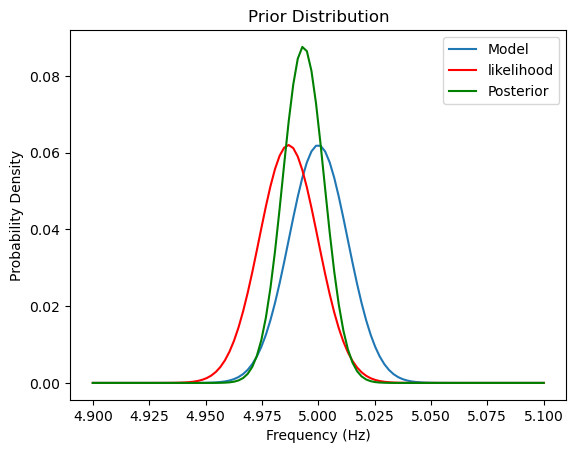

In [4]:
def model(t, A, omega, phi):
        return A * np.sin(omega * t + phi)


# Load the CSV file
file_path_data = 'Week6Data\\week6_5Hz50Samples.csv'
data = pd.read_csv(file_path_data, header=0)

file_path_time = 'Week6Data\\time_variable.csv'
times = pd.read_csv(file_path_time, header=0)

# Convert the data to a NumPy array
data_array = data.to_numpy()
# data_array = data_array.T
t = times.to_numpy()
t = t.flatten() 
# t = t.T

#convert data_array to float

# Print the shape of the data
print(f"t shape: {t}")
print(f"data shape: {data_array}")
# Print the first few rows of the data

freq = 5 #goal frequency in Hz
guesses = [1, freq * 2 * np.pi , 0];

# fit the model to each trace in the data
# Initialize an array to store the fitted parameters
# Loop through each trace in the data


params, _ = curve_fit(model, t, data_array[:, 0], p0=guesses)
freq_est = params[1] / (2 * np.pi)
print(f"Frequency measurement = {freq_est} Hz")

priorMean = 5; priorSD = 0.013

# plot a normal distribution with priormean and priorsd
x = np.linspace(4.9, 5.1, 100)

myprior = norm.pdf(x, priorMean, priorSD)
mylikelihood = norm.pdf(x,freq_est, priorSD)
myposterior = myprior * mylikelihood
# normalize the posterior
myposterior /= np.sum(myposterior)
myprior /= np.sum(myprior)
mylikelihood /= np.sum(mylikelihood)

# what is the frequency of the peak of the posterior
peak_freq_index = np.argmax(myposterior)
peak_freq = x[peak_freq_index]


plt.plot(x, myprior, label='Model')
plt.plot(x, mylikelihood, 'r', label='likelihood')
plt.plot(x, myposterior, 'g', label='Posterior')
plt.title('Prior Distribution')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()